In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Lambda, Input, AveragePooling2D
import tensorflow.keras.layers as layers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras import backend as K
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import random
import cv2
import os

import random

In [5]:
# Check filenames 
image_names=list(os.listdir("./Resources/data_upload_v2/images"))[1:]
image_names.sort()
print(image_names)

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Covid', 'Edema', 'Enlarged_Cardiomediastinum', 'Fracture', 'Lung_Lesion', 'Lung_Opacity', 'No_Finding', 'Pleural_Other', 'Pneumonia', 'Pneumothorax', 'Support_Devices']


In [7]:
# Directory with Atelectasis
atele_dir=os.path.join("./Resources/data_upload_v2/images")
df =pd.DataFrame.from_records({"file_name":os.listdir(atele_dir),"condition": "Atelectasis"})


for f in image_names[2:]:
    folder_path="./Resources/data_upload_v2/images/" + f
    temp_df= pd.DataFrame.from_records({"file_name":os.listdir(folder_path),"condition": f })
    df=df.append(temp_df)
    
df["condition"].value_counts()

No_Finding                    1898
Covid                          185
Pneumothorax                   164
Lung_Opacity                   156
Edema                          155
Support_Devices                154
Consolidation                  145
Enlarged_Cardiomediastinum     143
Fracture                       142
Lung_Lesion                    127
Pneumonia                      118
Pleural_Other                   99
Atelectasis                     15
Name: condition, dtype: int64

In [8]:
# balance classes - random Random Sampling No_Finding
df_no_finding = df[df["condition"]=="No_Finding"].sample(n=150, random_state=42)
df_balanced = df[df["condition"]!="No_Finding"].append(df_no_finding)
df_balanced["condition"].value_counts()

Covid                         185
Pneumothorax                  164
Lung_Opacity                  156
Edema                         155
Support_Devices               154
No_Finding                    150
Consolidation                 145
Enlarged_Cardiomediastinum    143
Fracture                      142
Lung_Lesion                   127
Pneumonia                     118
Pleural_Other                  99
Atelectasis                    15
Name: condition, dtype: int64

In [19]:
df_balanced["file_name"] = "./Resources/data_upload_v2/images/"+ df_balanced["file_name"]

In [14]:
batch_size = 32
img_height = 180
img_width = 180

In [41]:
data_dir = "./Resources/data_upload_v2/images/"


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(200,200), batch_size=128)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(200,200), batch_size=128)

Found 3764 files belonging to 14 classes.
Using 3012 files for training.
Found 3764 files belonging to 14 classes.
Using 752 files for validation.


In [42]:
class_names = train_ds.class_names
print(class_names)

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Covid', 'Edema', 'Enlarged_Cardiomediastinum', 'Fracture', 'Lung_Lesion', 'Lung_Opacity', 'No_Finding', 'Pleural_Other', 'Pneumonia', 'Pneumothorax', 'Support_Devices']


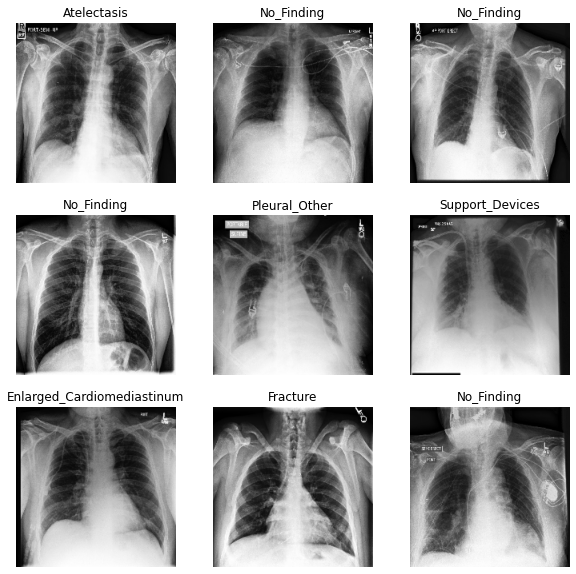

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
img_width, img_height=200,200
batch_size=128

data_dir = "Images/"


